In [9]:
import os
import random

import numpy as np
from tqdm import tqdm
from PIL import Image

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')

class GraspMask:
    def __init__(self):
        self.dino_v2 = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14")
        self.transform =  transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Resize(256),
                            transforms.CenterCrop(224),
                            transforms.Normalize([0.485, 0.456, 0.406],
                                                [0.229, 0.224, 0.225])
                        ])
        
    def get_features(self, image_path) -> torch.Tensor:
        pass
        
        
    def get_mask(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)
        image_features = self.dino_v2(image)
        
        
        return image_features

Using cache found in /Users/jacintosunersoler/.cache/torch/hub/facebookresearch_dinov2_main


In [10]:
grasp_mask = GraspMask()
mask = grasp_mask.get_mask("/Users/jacintosunersoler/Desktop/TFG/robot-grasping/images/IMG_1375.jpeg")

Using cache found in /Users/jacintosunersoler/.cache/torch/hub/facebookresearch_dinov2_main


<class 'PIL.Image.Image'>


RuntimeError: Numpy is not available

In [8]:
import torch
from PIL import Image
import torchvision.transforms as T

dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')

img = Image.open('images/image_1.jpeg')

transform = T.Compose([
T.Resize(224),
T.CenterCrop(224),
T.ToTensor(),
T.Normalize(mean=[0.5], std=[0.5]),
])

img = transform(img)[:3].unsqueeze(0)

with torch.no_grad():
    features = dinov2_vits14.forward_features(img)["x_norm_patchtokens"]

print(features.shape)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(features)

pca_features = pca.transform(features)
pca_features = (pca_features - pca_features.min()) / (pca_features.max() - pca_features.min())
pca_features = pca_features * 255

plt.imshow(pca_features.reshape(16, 16, 3).astype(np.uint8))
plt.savefig('meta_dog_features.png')

Using cache found in /Users/jacintosunersoler/.cache/torch/hub/facebookresearch_dinov2_main


torch.Size([1, 256, 384])


ModuleNotFoundError: No module named 'sklearn'

Unique values in mask_array: [0 1]


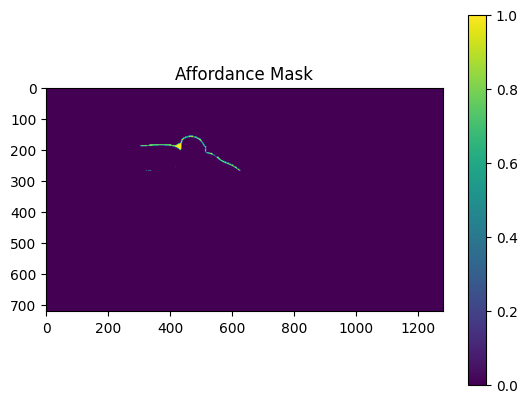

In [6]:
# Load the .npy file
import numpy as np
import matplotlib.pyplot as plt
mask_array = np.load('/home/jacinto/robot-grasp/data/pipeline_results_for_robot_and_cup/zeroed_affordance_mask.npy')

# Show the unique values of mask_array
unique_values = np.unique(mask_array)
print("Unique values in mask_array:", unique_values)

# Check for floating-point precision issues
if not np.all(np.isin(mask_array, [0, 1])):
    print("Warning: mask_array contains values other than 0 and 1")


# Plot the mask array
plt.imshow(mask_array, cmap='viridis')
plt.colorbar()
plt.title('Affordance Mask')
plt.show()